In [1]:
import yfinance as yf
import datetime
import numpy as np
#import sys


In [2]:

#need to create a time period for 2000's - yesterday for out training data
today = datetime.date.today()
yesterday = today - datetime.timedelta(days = 1)

#prompt user for ticker
ticker = input("Enter your ticker: ")
Tickerdata = yf.download(ticker, start = '2015-01-01', end = yesterday) 

#Validates that a ticker has populated the DF
while len(Tickerdata) == 0:
    ticker = input("Invalid Ticker, Please Enter a Valid Ticker: ")
    ticker = ticker.upper()
    Tickerdata = yf.download(ticker, start = '2015-01-01', end = yesterday) 

#prompt for monthly contribution and validates entry is integer
contrib = input("Enter your monthly contribution amount")
while contrib.isdigit() == False:
    contrib = input("Please enter a valid integer for monthly contribution amount")
contrib = int(contrib)

#add daily earnings and next day close feature that can be used as features/targets
Tickerdata["daily_earnings"] = Tickerdata["Close"] - Tickerdata["Open"]
Tickerdata['next_day_close'] = Tickerdata["Close"].shift(-1) # includes the next rows close price, may create an NA due to close price of "today" not being updated

#Add features based on the Date
Tickerdata['Weekday'] = Tickerdata.index.day_of_week
Tickerdata['Month'] = Tickerdata.index.month
Tickerdata['Year'] = Tickerdata.index.year

Tickerdata['Days_Since_Start'] = (Tickerdata.index - Tickerdata.index[0]).days #days since start tracking
Tickerdata['Years_Since_Start'] = Tickerdata['Days_Since_Start']/365
Tickerdata['Log_Close'] = np.log(Tickerdata['Close'])

#Add features based on performance
Tickerdata['SMA_200'] = Tickerdata['Close'].rolling(window = 200).mean() #200 day moving average using the rolling function, will create NANS that we will drop
Tickerdata['SMA_500'] = Tickerdata['Close'].rolling(window = 500).mean()
Tickerdata['Close:SMA_200'] = Tickerdata['Close',ticker]/Tickerdata['SMA_200']
Tickerdata['Close:SMA_500'] = Tickerdata['Close',ticker]/Tickerdata['SMA_500']
Tickerdata['Avg_Close_10yr'] = Tickerdata['Close'].mean()
avg_close = Tickerdata['Close'].mean()
Tickerdata['Avg_Close_10yr'] = avg_close[0]

#dropna values
Tickerdata.dropna(inplace=True)

#might be useful, unsure yet

#allocate the shares and shareprice
#currentdata = yf.Ticker(ticker)
#currentdf = currentdata.history(period='1d')
#share_price = currentdf['Close'][0]
#shares = contrib/share_price


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


https://www.numberanalytics.com/blog/8-innovative-log-linear-models-for-accurate-trend-forecasting

https://bowtiedraptor.substack.com/p/log-linear-model -- In a log linear model, we basically apply the log transformations function to our dependent variables (the y values). Here's a wiki article on some of the mathematics behind it. By doing so, this let's us basically take an exponential distribution, and helps scale the values down to a more workable linear distribution. The logarithmic transformation helps to "smooth" out the relationships between the variables, making them easier to visualize and interpret.




In [3]:


Tickerdata.corr()['Log_Close'] #year & years since start - highly correlated with log close which we can use as a base for long term growth predicitons

Price              Ticker
Close              SPY       0.989459
High               SPY       0.989485
Low                SPY       0.988985
Open               SPY       0.989031
Volume             SPY      -0.202056
daily_earnings               0.025309
next_day_close               0.988784
Weekday                     -0.002913
Month                        0.030021
Year                         0.959277
Days_Since_Start             0.966658
Years_Since_Start            0.966658
Log_Close                    1.000000
SMA_200                      0.968418
SMA_500                      0.952303
Close:SMA_200                0.162063
Close:SMA_500                0.258461
Avg_Close_10yr                    NaN
Name: Log_Close, dtype: float64

In [4]:
Tickerdata


Price,Close,High,Low,Open,Volume,daily_earnings,next_day_close,Weekday,Month,Year,Days_Since_Start,Years_Since_Start,Log_Close,SMA_200,SMA_500,Close:SMA_200,Close:SMA_500,Avg_Close_10yr
Ticker,SPY,SPY,SPY,SPY,SPY,,,,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,
2016-12-23,197.107590,197.116318,196.670951,196.863060,36697800,0.244530,197.596680,4,12,2016,721,1.975342,5.283750,184.157313,177.209526,1.070322,1.112286,323.715762
2016-12-27,197.596680,197.998380,197.360891,197.378360,42672500,0.218320,195.963593,1,12,2016,725,1.986301,5.286228,184.279691,177.260570,1.072265,1.114724,323.715762
2016-12-28,195.963593,197.876074,195.850075,197.858618,64095000,-1.895025,195.919922,2,12,2016,726,1.989041,5.277929,184.395313,177.314561,1.062736,1.105175,323.715762
2016-12-29,195.919922,196.391486,195.474542,196.033439,48696100,-0.113517,195.203842,3,12,2016,727,1.991781,5.277706,184.505716,177.371649,1.061864,1.104573,323.715762
2016-12-30,195.203842,196.339106,194.505217,196.251773,108998300,-1.047931,196.697144,4,12,2016,728,1.994521,5.274044,184.607025,177.423133,1.057402,1.100216,323.715762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-30,589.390015,591.130005,583.239990,588.929993,90601200,0.460022,592.710022,4,5,2025,3801,10.413699,6.379088,574.543089,514.008352,1.025841,1.146655,323.715762
2025-06-02,592.710022,592.789978,585.059998,587.760010,61630500,4.950012,596.090027,0,6,2025,3804,10.421918,6.384705,574.821866,514.360751,1.031119,1.152324,323.715762


In [5]:
#Simple Linear Regression Model That will establish a stable long term trend
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

linx = Tickerdata[['Years_Since_Start']]
liny = Tickerdata['Log_Close']

linx_train,linx_test, liny_train,liny_test = train_test_split(linx, liny, test_size= .2, shuffle=False) #do not shuffle for time series data
linreg_model = LinearRegression().fit(linx_train, liny_train)

In [6]:
log_test = linreg_model.predict(linx_test)
price_pred = np.exp(log_test)

The mean absolute percentage error (MAPE), also known as mean absolute percentage deviation (MAPD), is a measure of prediction accuracy of a forecasting method in statistics. - how far off predictions are on average.

In [7]:
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_percentage_error
print("lin model R2: ", r2_score(np.exp(liny_test), price_pred ))

rmse = root_mean_squared_error(np.exp(liny_test), price_pred)
print("RMSE:", rmse)
mape = mean_absolute_percentage_error(np.exp(liny_test), price_pred)
print("MAPE: ",mape*100,"%")



year = Tickerdata['Years_Since_Start'].iloc[-1]

Decade = np.array([[year+10]])

future_log = linreg_model.predict(Decade)

future_price = np.exp(future_log)[0]

print('Future Price Predicted: ',future_price)

current_price = Tickerdata['Close'].iloc[-1][0]

CAGR = (future_price/current_price)**(1/10)  - 1

print('Compound Annual Growth Rate: ', CAGR)


lin model R2:  0.5341042399258107
RMSE: 37.44761426018045
MAPE:  5.963540290381722 %
Future Price Predicted:  1896.5603612836373
Compound Annual Growth Rate:  0.1232787338636292


The Linear model above, seems to forecast index funds pretty well, it has a low RMSE (in $ value) when compared to the actual cost of most index funds, its MAPE is usually below 10% but does go as high as 12% for some index funds and it usually predicts a 7 - 15% compound annual growth rate for index fund which is a realistic CAGR. Amongst all index fund - it seems to perform very well for index funds that track the S&P500

However, the model seems to have a very high MAPE and an RMSE off by 2 - 3 figures for blue chip stocks, which usually cost 100's of dollars and are much more volatile, therefore although the linear model does a good job forecasting for index funds, it should NOT be used for blue chips, at least not as it stands. As far as the R2 score goes, considering blue chip stocks are volatile, the model will do a bad job at catching the variance for many blue chip stocks such as AAPL and MSFT especially since these stocks will have a lot of days over their history acting as outliers. 

In [8]:
from tensorflow import keras
import pandas as pd

short_term_features = ['Weekday', 'Month', 'Open','Years_Since_Start','Days_Since_Start', 'SMA_200', 'SMA_500']
#short_term_features = ['Weekday', 'Month', 'Open','Years_Since_Start','Days_Since_Start']
#short_term_features = ['Weekday', 'Month', 'Open', 'Days_Since_Start']


x = Tickerdata[short_term_features]
y = Tickerdata['Log_Close'].values.reshape(-1, 1) 

2025-06-09 09:09:39.726242: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-09 09:09:39.728839: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-09 09:09:39.736493: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749452979.748902  461294 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749452979.752673  461294 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-09 09:09:39.765954: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [9]:
#https://www.youtube.com/watch?v=94PlBzgeq90 , he does not creat a function in the video, it might be better to create a function and call it since this is a repetitive process

from sklearn.preprocessing import StandardScaler
xscaler = StandardScaler()
yscaler = StandardScaler()
#y.values.reshape(-1,1)
xscale= xscaler.fit_transform(x)
yscale = yscaler.fit_transform(y)

In [10]:
def train_lstm(x, y, window=252):
    x_lstm, y_lstm = [], []
    for i in range(window, len(x)):
        x_lstm.append(x[i-window:i])
        y_lstm.append(y[i]) 
        # creates 30 day chunks one day at a time, overlapping one day at a time until the last day of the dataframe for x to predict the end 30 day chunk of y
    return np.array(x_lstm), np.array(y_lstm)
x_lstm, y_lstm = train_lstm(xscale, yscale, window=252)

x_train,x_test,y_train,y_test = train_test_split(x_lstm, y_lstm, test_size=.2, shuffle=False)


In [11]:
'''
import keras_tuner as kt
import tensorflow as tf

def build_model(hp):
    units_1 = hp.Choice('units_1',[16,32,64,128])
    units_2 = hp.Choice('units_2',[16,32,64,128])

    
    model = keras.Sequential()
    model.add(keras.layers.LSTM(
    units_1, return_sequences = True, input_shape=(x_train.shape[1],x_train.shape[2])))
    
    

    model.add(keras.layers.LSTM(
    units_2, return_sequences = False))
    
    model.add(keras.layers.Dense(64))

    
    model.add(keras.layers.Dense(1))
    model.compile(loss='mean_squared_error', optimizer = 'adam', metrics=['mean_absolute_percentage_error'])
    return model


tuner = kt.RandomSearch(
    build_model,
    objective = 'val_mean_absolute_percentage_error',
    max_trials = 16, 
    overwrite = True
) 


tuner.search(x_train,y_train, epochs = 10, validation_split = 0.3,batch_size = 64, callbacks =
                
    [tf.keras.callbacks.EarlyStopping(
    monitor = 'val_mean_absolute_percentage_error',
    patience = 3,
    restore_best_weights = True
    )]

    )
best_model = tuner.get_best_models()[0]


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

####

#from tensorflow.keras.regularizers import l1

#model= keras.models.Sequential()
#model.add(LSTM(128, return_sequences=False, input_shape=(x_train.shape[1],x_train.shape[2]))) 
#model.add(Dense(225, activation='relu'))
#model.add(Dropout(.3))
#model.add(Dense(1))
#model.compile(loss='mean_squared_error', optimizer = 'adam')
#model.summary()
'''
#128'''
#64

"\nimport keras_tuner as kt\nimport tensorflow as tf\n\ndef build_model(hp):\n    units_1 = hp.Choice('units_1',[16,32,64,128])\n    units_2 = hp.Choice('units_2',[16,32,64,128])\n\n    \n    model = keras.Sequential()\n    model.add(keras.layers.LSTM(\n    units_1, return_sequences = True, input_shape=(x_train.shape[1],x_train.shape[2])))\n    \n    \n\n    model.add(keras.layers.LSTM(\n    units_2, return_sequences = False))\n    \n    model.add(keras.layers.Dense(64))\n\n    \n    model.add(keras.layers.Dense(1))\n    model.compile(loss='mean_squared_error', optimizer = 'adam', metrics=['mean_absolute_percentage_error'])\n    return model\n\n\ntuner = kt.RandomSearch(\n    build_model,\n    objective = 'val_mean_absolute_percentage_error',\n    max_trials = 16, \n    overwrite = True\n) \n\n\ntuner.search(x_train,y_train, epochs = 10, validation_split = 0.3,batch_size = 64, callbacks =\n                \n    [tf.keras.callbacks.EarlyStopping(\n    monitor = 'val_mean_absolute_percen

In [12]:
import tensorflow as tf
model = keras.models.Sequential()
model.add(keras.layers.LSTM(256, return_sequences=True, input_shape=(x_train.shape[1],x_train.shape[2]))) 
model.add(keras.layers.LSTM(128, return_sequences=False )) 
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer = 'adam', metrics=['mean_absolute_percentage_error'])
model.summary()


2025-06-09 09:09:41.008204: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/eduard/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 252, 256)       │       270,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 471,617 (1.80 MB)

 Trainable params: 471,617 (1.80 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
hist = model.fit(x_train, y_train, epochs=30, batch_size=2048, validation_split=.3, verbose=1,callbacks =
                
    [tf.keras.callbacks.EarlyStopping(
    monitor = 'val_mean_absolute_percentage_error', mode = 'min',
    patience = 30,
    restore_best_weights = True
    )])


Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0051 - mean_absolute_percentage_error: 20.6097 - val_loss: 0.0259 - val_mean_absolute_percentage_error: 50.6401
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0053 - mean_absolute_percentage_error: 14.1216 - val_loss: 0.0239 - val_mean_absolute_percentage_error: 48.7529
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0059 - mean_absolute_percentage_error: 16.9400 - val_loss: 0.0238 - val_mean_absolute_percentage_error: 48.6796
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0054 - mean_absolute_percentage_error: 13.9344 - val_loss: 0.0251 - val_mean_absolute_percentage_error: 49.9498
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0050 - mean_absolute_percentage_error: 19.1306 - val_loss: 0.0266 - val_mean_absolute_percentage_error: 51.3702
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0055 - mean_absolute_percentage_error: 27.6962 - val_loss: 0.0273 - val_mean_absolute_percentage_e

KeyboardInterrupt: 

In [ ]:
y_pred = model.predict(x_test)
y_pred_real = yscaler.inverse_transform(y_pred)
y_test_real = yscaler.inverse_transform(y_test.reshape(-1, 1))

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


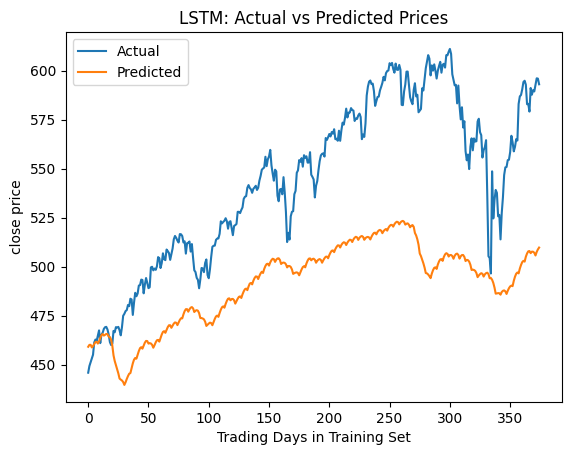

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.exp(y_test_real), label='Actual')
plt.plot(np.exp(y_pred_real), label='Predicted')
plt.title("LSTM: Actual vs Predicted Prices")
plt.legend()
plt.xlabel('Trading Days in Training Set')
plt.ylabel('close price')
plt.show()

In [ ]:

LSTM_rmse = root_mean_squared_error(np.exp(y_test_real),np.exp(y_pred_real))
LSTM_r2 = r2_score(np.exp(y_test_real),np.exp(y_pred_real))
LSTM_mape = mean_absolute_percentage_error(np.exp(y_test_real),np.exp(y_pred_real))

print(f"RMSE:" ,rmse)   

print(f"R2: ", LSTM_r2)
print('MAPE:', LSTM_mape*100,"%")

RMSE: 85.61927713896274
R2:  0.3923395047093817
MAPE: 6.756234443059908 %


In [ ]:
Avg_Close_10yrfrom datetime import timedelta
import numpy as np



forecast_features = [
    'Weekday', 'Month', 'Open', "Days_Since_Start", "SMA_200, SMA_500"
    ]

# Setup
window = 252
forecast_days = 2520

#use some of our old data
feature_hist = xscale[-window:] 

last_day_count = Tickerdata['Days_Since_Start'].iloc[-1]
total_years = Tickerdata['Years_Since_Start'].iloc[-1]
date = Tickerdata.index[-1]
SMA_200 = Tickerdata['SMA_200']
SMA_500 = Tickerdata['SMA_500']

future_dates = []
pred_log = []
pred_price = []

for i in range(forecast_days):
    
    # Reshape our data for LSTM
    LSTM_input = feature_hist.reshape(1, window, -1)
    #Predict on our data
    log_scaled = best_model.predict(LSTM_input)[0, 0]
    #transform our target
    log_real = yscaler.inverse_transform([[log_scaled]])[0, 0]
    #append our predicted log value to list
    pred_log.append(log_real)
    #exponentiate to list of predictions in dollars
    pred_price.append(np.exp(log_real))
    #skip non trading days
    while date.weekday() > 4:
        date += timedelta(days=1)
    #append next trading day to future dates    
    future_dates.append(date)

    # 3. Generate next row using predicted price as "Open"
    year = total_years + i / 252
    new_row = {
        'Weekday': date.weekday(),
        'Month': date.month,
        'Open': np.exp(log_real),
        'Year': date.year,
        'Years_Since_Start': year,
        'Days_Since_Start': last_day_count + i + 1,   
        'SMA_200':SMA_200
        'SMA500':SMA_500
    }
    #create array of features
    new_vals = np.array([[new_row[feat] for feat in forecast_features]])
    #scale the new vals
    new_scaled = xscaler.transform(new_vals)

    #  Update window
    feature_hist = np.vstack([feature_hist, new_scaled])[-window:]



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

In [ ]:
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Log_Close_Pred': pred_log,
    'Close_Pred': pred_price
}).set_index('Date')

In [ ]:
LSTM_final = forecast_df['Close_Pred'].iloc[-1]

hybrid_price = 0.5*future_price+0.5*LSTM_final


In [ ]:
forecast_df

,Log_Close_Pred,Close_Pred
Date,,
2025-06-05,5.357204,212.131054
2025-06-05,5.367082,214.236736
2025-06-05,5.377825,216.550819
2025-06-05,5.388449,218.863670
2025-06-05,5.398578,221.091856
...,...,...
2025-06-05,5.504360,245.761171
2025-06-05,5.504284,245.742562
2025-06-05,5.504208,245.723818
